# ***Installing Transformer***

In [1]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 22.5 MB/s eta 0:00:00


In [4]:
!pip install pillow

In [31]:
import numpy as np
import torch

# ***Importing libraries***

In [32]:
import numpy as np
from transformers import ViTFeatureExtractor, ViTForImageClassification
from IPython.display import Image, display
from PIL import Image as PILImage
import torch



# ***Giving the file I want to try***
Uploaded into the colab folder to make a try

In [33]:
# Specify the image file name
FILE_NAME = 'Image_47.jpg'



# ***Showing the input image into a given dimension***

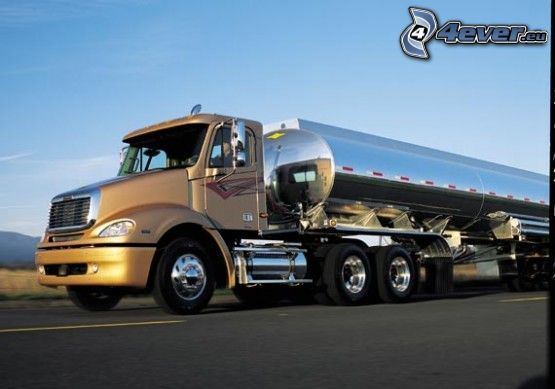

In [34]:
# Display the image
display(Image(FILE_NAME, width=400, height=400))



# ***Opeing the image as an 'NP array' and then convert it into a 'tensor'***

In [35]:
# Open the image using PIL
image = PILImage.open(FILE_NAME)

# Create a PyTorch tensor from the image
image_tensor = torch.tensor(np.array(image))



# ***Converting the tensor into an expected data type of Vision Transformer model***

In [36]:
# Ensure the image tensor is in the expected data type
image_tensor = image_tensor.to(torch.float)



# ***Initializing the model***

In [37]:
# Initialize the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')



/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


# ***Prepare input of the model***

In [38]:
# Prepare inputs for the model
inputs = feature_extractor(images=image_tensor, return_tensors="pt")
output = model(**inputs)
logits = output.logits

In [39]:
logits.shape

torch.Size([1, 1000])

# ***Predicting from the model***

In [40]:
predicted_class_idx = logits.argmax(-1).item()

# ***Printing value***

In [41]:
print(predicted_class_idx)

867


# ***Printing the predicted class of the object***

In [42]:
print("Predicted class: ", model.config.id2label[predicted_class_idx])

Predicted class:  trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
